In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

from logistic_regression import CustomLogisticRegression

## Data Preprocessing

In [316]:
red_wine = pd.read_csv("wine+quality/winequality-red.csv", sep=";")
white_wine = pd.read_csv("wine+quality/winequality-white.csv", sep=";")

wine_dataset = pd.concat([red_wine, white_wine], ignore_index=True)

print(wine_dataset.info(),wine_dataset.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None    fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70     

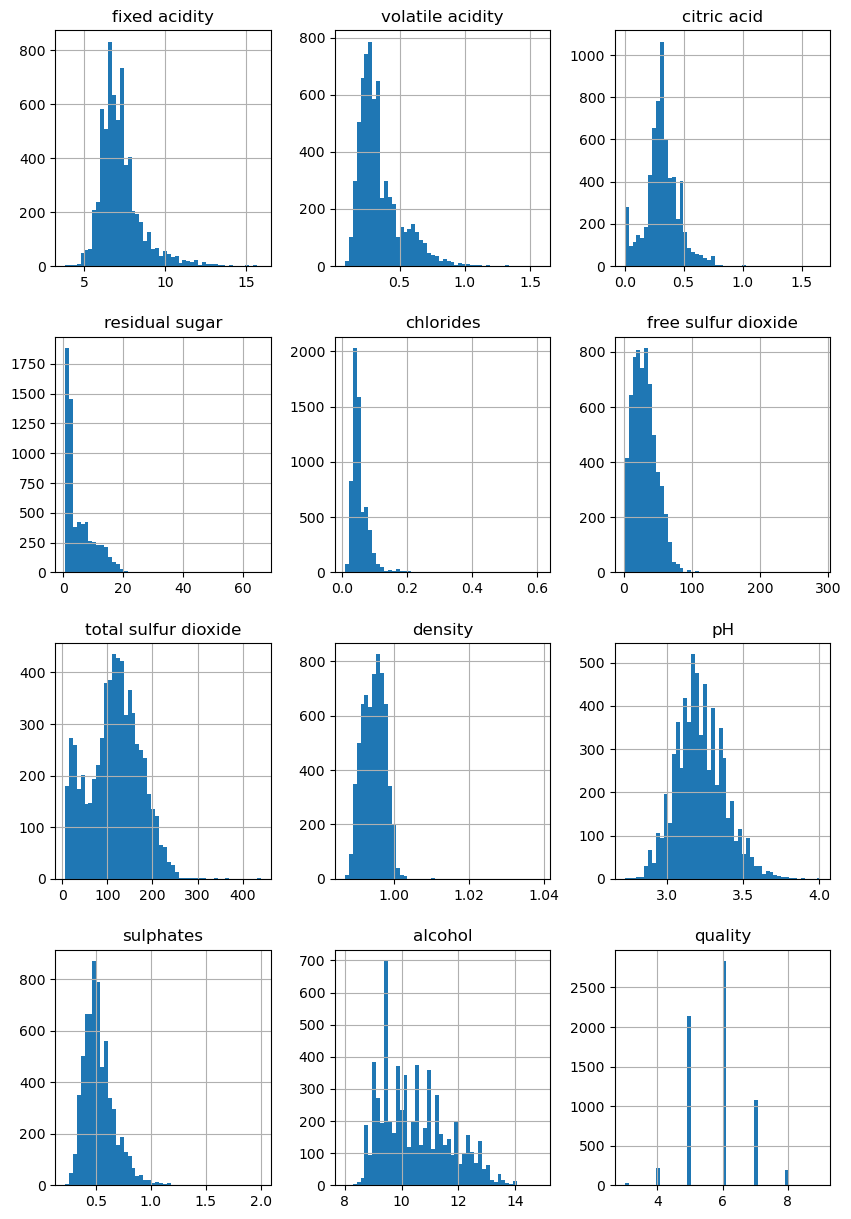

In [317]:
wine_dataset.hist(bins=50, figsize=(10,15))
plt.show()

In [318]:
# Convert quality to binary (0 = not good, 1 = good)
wine_dataset['quality'] = wine_dataset['quality'].apply(lambda x: 1 if x >= 7 else 0)

X = wine_dataset.drop(columns=['quality']) 
y = wine_dataset['quality']

# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Exploratory Data Analysis

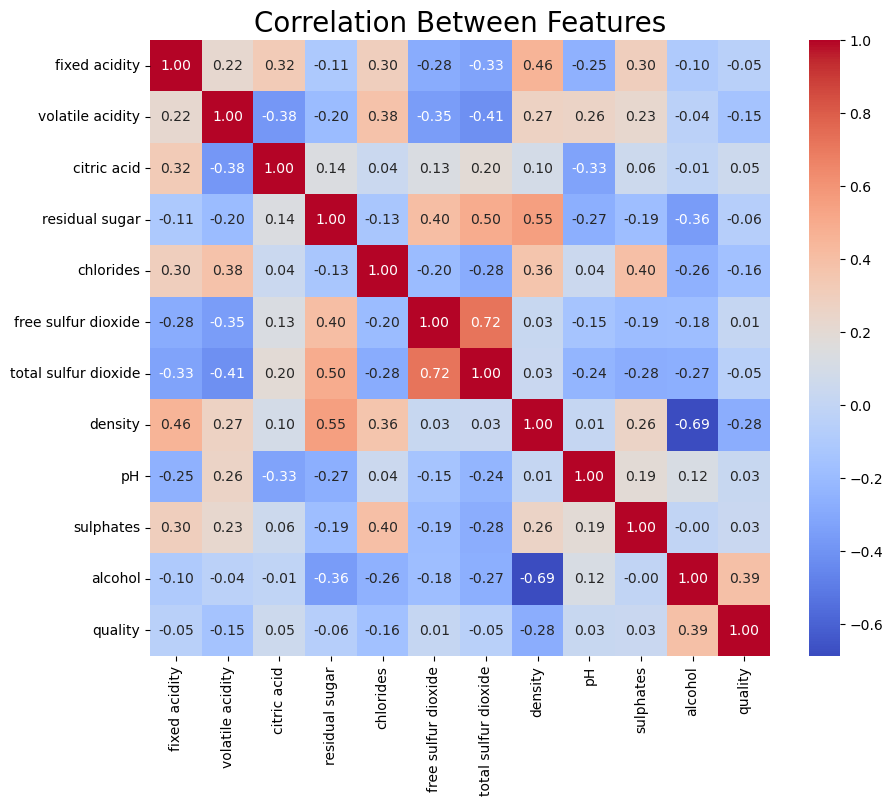

In [319]:
# Check correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(wine_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features", fontsize=20)
plt.show()

alcohol                 0.390486
citric acid             0.054444
sulphates               0.033971
pH                      0.028149
free sulfur dioxide     0.014767
fixed acidity          -0.049447
total sulfur dioxide   -0.051226
residual sugar         -0.063992
volatile acidity       -0.151714
chlorides              -0.161781
density                -0.275441
Name: quality, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9092\3919205071.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_values_sorted.values, y=correlation_values_sorted.index, palette="coolwarm")


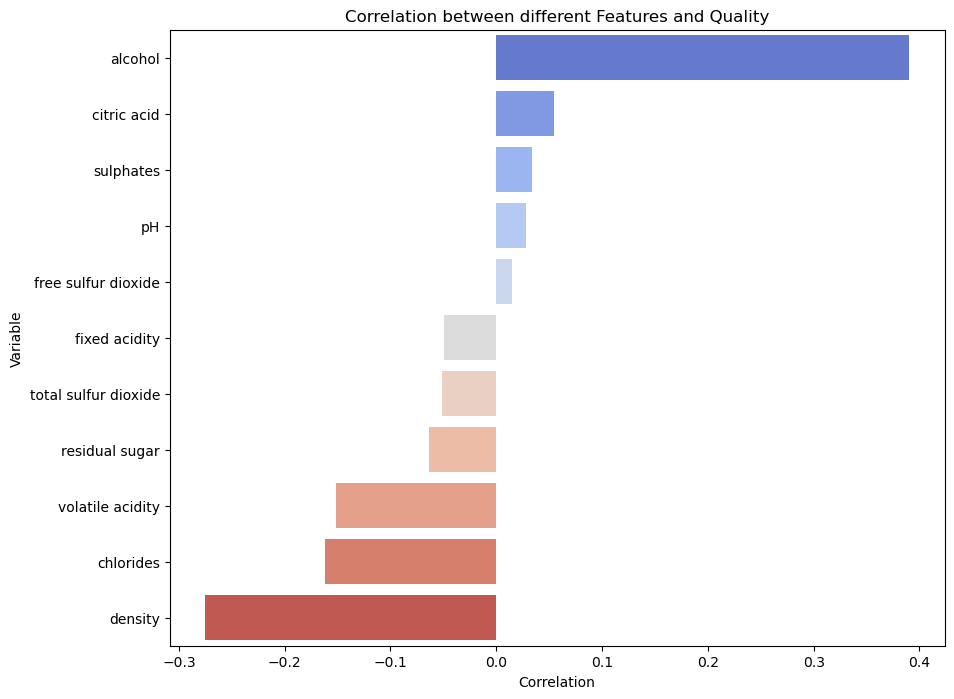

In [320]:
# Check correlation between quality and other features
correlation_matrix = wine_dataset.corr()

correlation_values = correlation_matrix['quality'].drop('quality')
correlation_values_sorted = correlation_values.sort_values(ascending=False)
print(correlation_values_sorted)
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_values_sorted.values, y=correlation_values_sorted.index, palette="coolwarm")
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.title('Correlation between different Features and Quality')
plt.show()

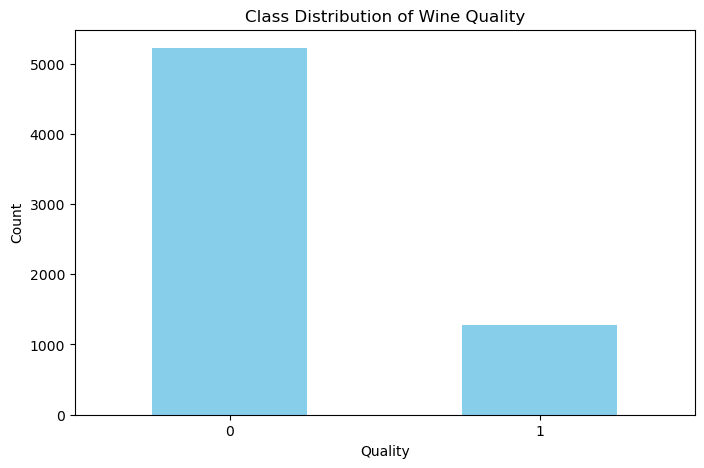

In [321]:
# Check class distribution of quality
class_counts = wine_dataset['quality'].value_counts()
class_counts.plot(kind='bar', color='skyblue', figsize=(8, 5), title="Class Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## Model Training

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)    
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4547, 11)
X_test shape: (1950, 11)
y_train shape: (4547,)
y_test shape: (1950,)


                 Feature  Coefficient  Absolute Coefficient
7                density    -0.953353              0.953353
3         residual sugar     0.854058              0.854058
10               alcohol     0.656426              0.656426
0          fixed acidity     0.584281              0.584281
1       volatile acidity    -0.535865              0.535865
6   total sulfur dioxide    -0.377089              0.377089
8                     pH     0.369021              0.369021
9              sulphates     0.364561              0.364561
5    free sulfur dioxide     0.263280              0.263280
4              chlorides    -0.168422              0.168422
2            citric acid    -0.023974              0.023974


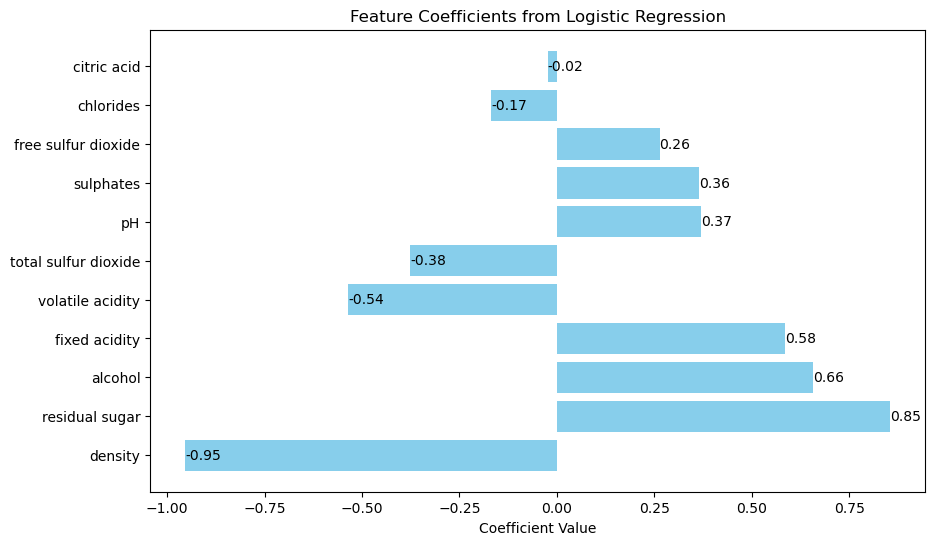

In [329]:
# Model with Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

# Check coefficients
coefficients = model.coef_[0]
feature_names = X.columns  
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()

coeff_df_sorted = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)
print(coeff_df_sorted)

plt.figure(figsize=(10, 6))
plt.barh(coeff_df_sorted['Feature'], coeff_df_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients from Logistic Regression')
for index, value in enumerate(coeff_df_sorted['Coefficient']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()


In [324]:
# Model with Logistic Regression with Liblinear solver
model2 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)
model2.fit(X_train, y_train)
prediction_2 = model2.predict(X_test)

# Model with custom Logistic Regression
model3 = CustomLogisticRegression(num_iterations=1000)
model3.fit(X_train, y_train)
prediction_3 = model3.predict(X_test)

# Model with Naive Bayes
model4 = GaussianNB()
model4.fit(X_train, y_train)
prediction_4 = model4.predict(X_test)

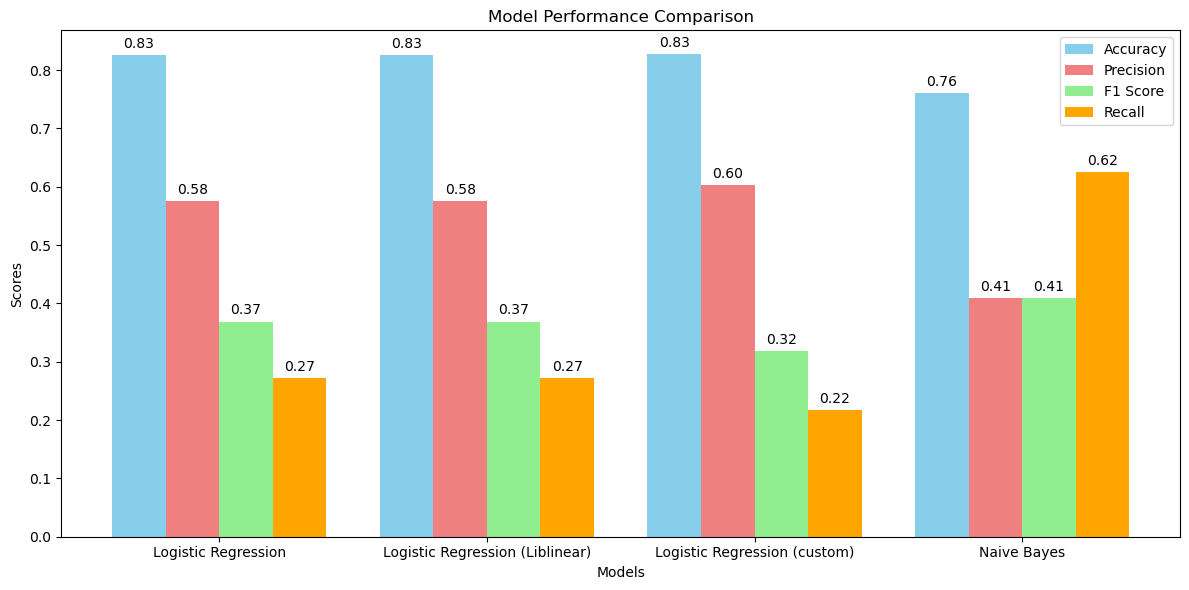

In [325]:
# Compare model performance

# Model with Logistic Regression
accuracy_1 = accuracy_score(y_test, prediction)
precision_1 = precision_score(y_test, prediction)
f1_score_1 = f1_score(y_test, prediction)
recall_1 = recall_score(y_test, prediction)

# Model with Logistic Regression with Liblinear solver
accuracy_2 = accuracy_score(y_test, prediction_2)
precision_2 = precision_score(y_test, prediction_2)
f1_score_2 = f1_score(y_test, prediction_2)
recall_2 = recall_score(y_test, prediction_2)

# Model with custom Logistic Regression
accuracy_3 = accuracy_score(y_test, prediction_3)
precision_3 = precision_score(y_test, prediction_3)
f1_score_3 = f1_score(y_test, prediction_3)
recall_3 = recall_score(y_test, prediction_3)

# Model with Naive Bayes
accuracy_4 = accuracy_score(y_test, prediction_4)
precision_4 = precision_score(y_test, prediction_4)
f1_score_4 = f1_score(y_test, prediction_4)
recall_4 = recall_score(y_test, prediction_4)



models = ['Logistic Regression', 'Logistic Regression (Liblinear)', 'Logistic Regression (custom)', 'Naive Bayes']
accuracies = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
precisions = [precision_1, precision_2, precision_3, precision_4]
f1_scores = [f1_score_1, f1_score_2, f1_score_3, precision_4]
recalls = [recall_1, recall_2, recall_3, recall_4]

x = np.arange(len(models))
width = 0.2 

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width*1.5, accuracies, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x - width/2, precisions, width, label='Precision', color='lightcoral')
bars3 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color='lightgreen')
bars4 = ax.bar(x + width*1.5, recalls, width, label='Recall', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend()

for bars in [bars1, bars2, bars3, bars4]:
    ax.bar_label(bars, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

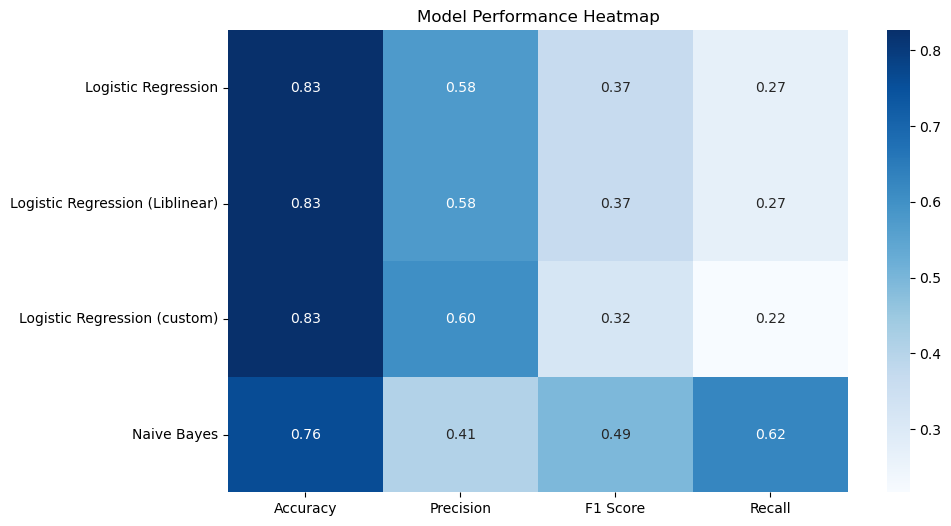

In [326]:
data = {
    'Accuracy': [accuracy_1, accuracy_2, accuracy_3, accuracy_4],
    'Precision': [precision_1, precision_2, precision_3, precision_4],
    'F1 Score': [f1_score_1, f1_score_2, f1_score_3, f1_score_4],
    'Recall': [recall_1, recall_2, recall_3, recall_4]
}

df = pd.DataFrame(data, index=models)

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Model Performance Heatmap')
plt.show()

In [327]:
# For fun: User can input the features to predict the quality using different models
def predict_quality():
    feature_names = [
        "Fixed Acidity", "Volatile Acidity", "Citric Acid", 
        "Residual Sugar", "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", 
        "Density", "pH", "Sulphates", "Alcohol"
    ]
    
    input_values = []
    
    for feature in feature_names:
        while True:
            try:
                value = float(input(f"Enter the value for {feature}: "))
                input_values.append(value)
                break 
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    
    input_array = np.array([input_values])

    prediction = model.predict(input_array)
    print(f"Predicted quality with Logistic Regression: {prediction[0]}")
    
    prediction_2 = model2.predict(input_array)
    print(f"Predicted quality with Logistic Regression (Liblinear): {prediction_2[0]}")

    precision_3 = model3.predict(input_array)
    print(f"Predicted quality with Logistic Regression (custom): {prediction_3[0]}")
    
    prediction_4 = model4.predict(input_array)
    print(f"Predicted quality with Gaussian Naive Bayes: {prediction_4[0]}")

# predict_quality()